In [38]:
import pandas as pd
import numpy as np
import cv2
import os
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,Dropout
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [4]:
train=pd.read_csv('D:\\Ankit\\Python\\input\\fasion\\train_LbELtWX\\train.csv')
test=pd.read_csv('D:\\Ankit\\Python\\input\\fasion\\test_ScVgIM0\\test.csv')

train_image_path='D:\\Ankit\\Python\\input\\fasion\\train_LbELtWX\\train\\'
test_image_path='D:\\Ankit\\Python\\input\\fasion\\test_ScVgIM0\\test\\'


train_img=[]
for i in train['id'].astype('str'):
    train_img.append(cv2.imread(train_image_path+i+".png",0))
    #img=cv2.imread(train_image_path+i,0)
    #train_img.append(img)
    
    
test_img=[]
for i in test['id'].astype('str'):
    test_img.append(cv2.imread(test_image_path+i+".png",0))
    #img=cv2.imread(test_image_path+i,0)
    #test_img.append(img)

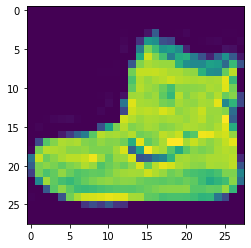

In [5]:
plt.imshow(train_img[0])

In [6]:
train_img = np.array(train_img)
test_img = np.array(test_img)

In [7]:
train_img.shape[1]

28

In [8]:
X_data = train_img.reshape(train_img.shape[0],train_img.shape[1],train_img.shape[2],1)   

In [9]:
Y_data = test_img.reshape(test_img.shape[0],test_img.shape[1],test_img.shape[2],1)

In [10]:
y_data = to_categorical(train['label'])

In [11]:
y_data.shape

(60000, 10)

In [12]:
X_data.shape

(60000, 28, 28, 1)

In [13]:
Y_data.shape

(10000, 28, 28, 1)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_data,test_size=0.3,random_state=777)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)
(42000, 10)
(18000, 10)


In [16]:
model = Sequential()

In [17]:
input_shape = (X_data.shape[1],X_data.shape[2],X_data.shape[3])

In [18]:
input_shape

(28, 28, 1)

In [19]:
model.add(Conv2D(input_shape = input_shape,filters=50,kernel_size =(3,3),strides =(1,1),padding = 'valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [20]:
model.output_shape

(None, 13, 13, 50)

In [21]:
model.add(Flatten())

In [22]:
model.output_shape

(None, 8450)

In [23]:
model.add(Dense(50,activation ='relu'))

In [24]:
model.add(Dropout(0.2))

In [25]:
model.add(Dense(10,activation = 'softmax'))

In [26]:
adam = optimizers.Adam(lr = 0.001)

In [27]:
model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics=['accuracy'])

In [28]:
%%time
history = model.fit(X_train,Y_train,batch_size =50,validation_split=0.2,epochs =25,verbose=1 )

Epoch 1/25
672/672 [==============================] - 53s 79ms/step - loss: 0.6939 - accuracy: 0.7481 - val_loss: 0.3886 - val_accuracy: 0.8642
Epoch 2/25
672/672 [==============================] - 52s 78ms/step - loss: 0.4804 - accuracy: 0.8202 - val_loss: 0.3674 - val_accuracy: 0.8607
Epoch 3/25
672/672 [==============================] - 52s 78ms/step - loss: 0.4215 - accuracy: 0.8395 - val_loss: 0.3342 - val_accuracy: 0.8814
Epoch 4/25
672/672 [==============================] - 52s 78ms/step - loss: 0.3892 - accuracy: 0.8531 - val_loss: 0.3374 - val_accuracy: 0.8720
Epoch 5/25
672/672 [==============================] - 52s 77ms/step - loss: 0.3718 - accuracy: 0.8596 - val_loss: 0.3107 - val_accuracy: 0.8831
Epoch 6/25
672/672 [==============================] - 52s 78ms/step - loss: 0.3489 - accuracy: 0.8686 - val_loss: 0.3196 - val_accuracy: 0.8868
Epoch 7/25
672/672 [==============================] - 53s 78ms/step - loss: 0.3350 - accuracy: 0.8726 - val_loss: 0.3183 - val_accuracy:

In [36]:
model.save('fashion.h5')

In [39]:
mod = keras.models.load_model('fashion.h5')

https://www.tensorflow.org/guide/keras/save_and_serialize

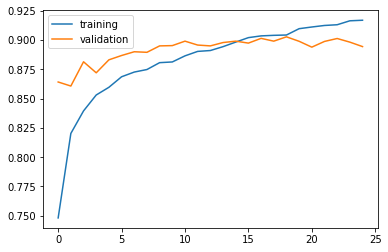

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [41]:
results = mod.evaluate(X_test,Y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.3678 - accuracy: 0.9007


In [43]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9006666541099548
